In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("../listings.csv")

## Choose one variable and plot that variable four different ways. 

Choosing Price.

1. QQ plot (exp)
2. Line plot
3. Boxplot
4. Histogram
5. Kernel plot

In [3]:
from scipy.stats import expon 

exp_model = expon.fit(df["price"]) 
scale_param = exp_model[1]

print(scale_param)
print(exp_model)

86.0539757709
(7.9999998892576372, 86.05397577091442)


1. QQ plot, exponential distribution


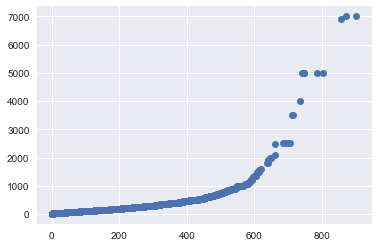

In [4]:
print('1. QQ plot, exponential distribution')
exp_distrib = np.random.exponential(81.65, 53904)
exp_distrib.sort()
plt.plot(exp_distrib, df['price'].sort_values(), "o")
plt.show() 

The plot shows that Price is exponentially distributed. 

In [5]:
df.describe()
np.percentile(df['price'], 95)

246.0

In [6]:
df.loc[df["price"] > 246, 'price'] = 246 ##winsorizing upper limit

2. Line plot of first 200 sorted observations


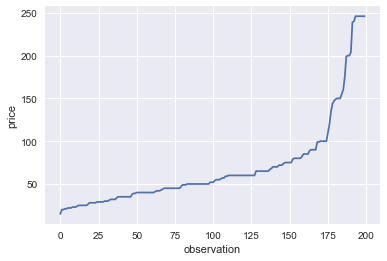

In [7]:
print('2. Line plot of first 200 sorted observations')
plt.plot(np.arange(200), df.iloc[0:200]['price'].sort_values())
plt.xlabel('observation')
plt.ylabel('price')
plt.show()

Visualisation of first 200 sorted observations also demonstrate exp distribution.

3. Boxplot


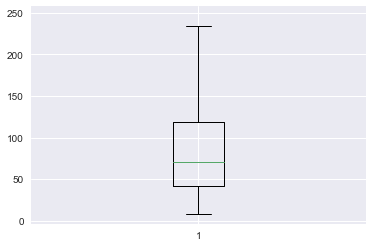

In [8]:
print('3. Boxplot')
plt.boxplot(df['price'])
plt.show()

The median is less than mean = positive skew = the majority of observations is laying before mean. 

In [9]:
df = df.sample(5000)

In [10]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.000000e+03,5.000000e+03,0.0,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,3507.000000,5000.00000,5000.000000
mean,1.049783e+07,3.281661e+07,NaN,51.510637,-0.126385,87.740800,3.17400,12.298600,1.303964,14.47580,157.107800
std,5.185202e+06,3.118165e+07,NaN,0.044410,0.087565,58.039998,7.88171,24.892283,1.449472,79.38662,144.148808
min,2.925600e+04,9.870000e+03,NaN,51.334454,-0.482807,11.000000,1.00000,0.000000,0.020000,1.00000,0.000000
25%,6.499924e+06,7.277544e+06,NaN,51.485488,-0.186556,43.000000,1.00000,0.000000,0.300000,1.00000,10.000000
50%,1.158699e+07,2.284642e+07,NaN,51.514858,-0.120600,70.000000,2.00000,3.000000,0.770000,1.00000,93.000000
75%,1.512646e+07,4.868454e+07,NaN,51.538856,-0.069591,119.000000,3.00000,12.000000,1.815000,3.00000,323.000000
max,1.754335e+07,1.189662e+08,NaN,51.675061,0.247548,246.000000,300.00000,290.000000,14.000000,711.00000,365.000000


4. Histogram


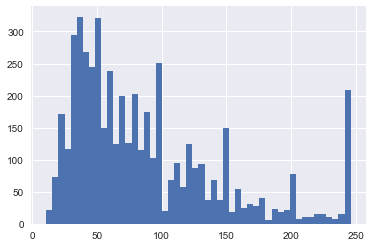

4. OR Seaborn: Distribution plot


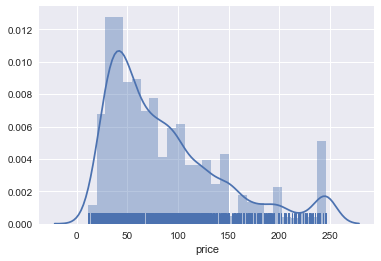

In [11]:
print('4. Histogram')
plt.hist(df['price'], align='mid', bins = 50) # range=[25, 250]
plt.show()

print('4. OR Seaborn: Distribution plot')
sns.distplot(df['price'], rug=True);

Distribution shows long right tail, left-centered. 

5. Kernel plot


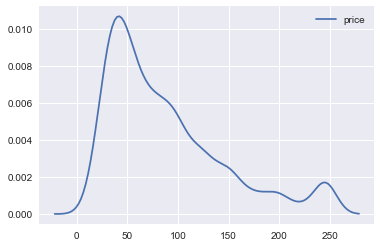

In [12]:
print('5. Kernel plot')
sns.kdeplot(df['price']);

## Choose two continuous variables, and plot them three different ways.

Choosing Price and Number of reviews.
1. Hexbin plot
2. Scatterplot with regression
3. Jointplot

1. Hexbin plot


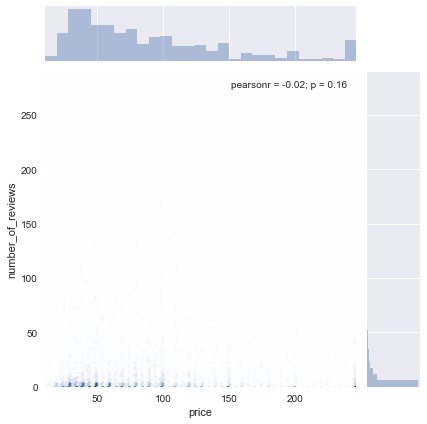

In [13]:
print('1. Hexbin plot')
sns.jointplot(y='number_of_reviews', x='price', data=df, kind="hex");
# range?

Doesn't replresent the data well. 

2. Scatterplot with regression


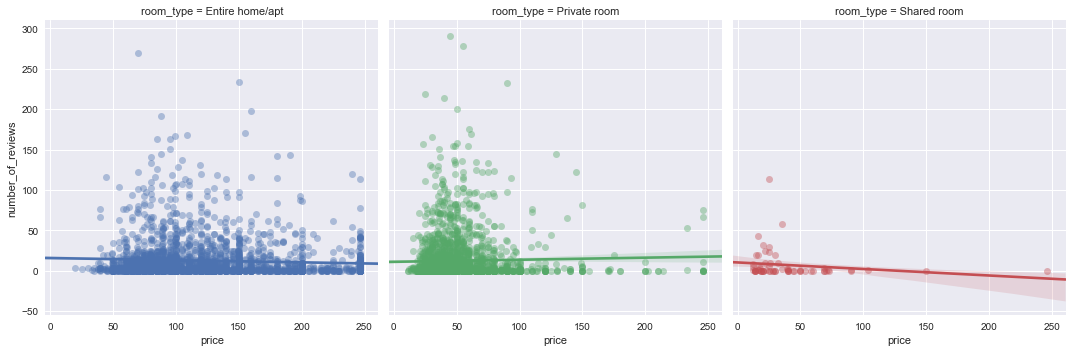

In [14]:
print('2. Scatterplot with regression')
g = sns.lmplot(x='price', 
               y='number_of_reviews',
               hue ='room_type',
               col ='room_type',
               data = df,
               fit_reg=True,
               scatter_kws={'alpha':0.4})
g.set_ylabels("number_of_reviews")
g.set_xlabels("price");

No correlation btw reviews and price. 

- Entire home type has a wider range of price and reviews => more spread.
- Private rooms in shared apt type is dominated by low priced appartments with many reviews. There're a few highly priced rooms with about 20 revies. 
- Shared room type is underepresented in the sample. Low priced shared rooms under 40 dollars have some reviews. people don't normally leave reviews on rooms over 40 dollars

3. Jointplot


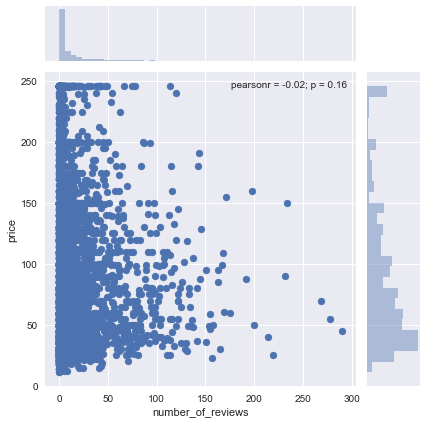

In [15]:
print('3. Jointplot')
sns.jointplot(x='number_of_reviews', 
               y='price',
               data=df);

## Choose one continuous variable and one categorical variable, and plot them six different ways

1. Boxplots for types of room
2. Categorical scatterplots
3. Violinplot
4. Factorplot and Countplot
5. Pointplot
6. Swarmplot

1. Boxplots for types of room


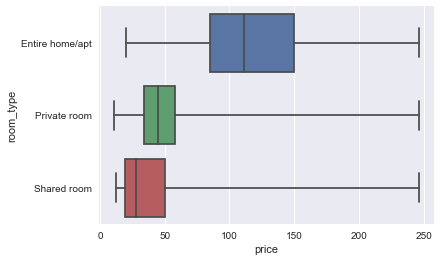

In [16]:
print("1. Boxplots for types of room")

sns.boxplot(x="price", y="room_type", data=df,
            whis=np.inf); #fills whiskers

# Add in points to show each observation
# sns.swarmplot(x="price", y="room_type", data=df, size=2, color=".3", linewidth=0)

Prices for shared room are lower than that of Private room and Entire home, respectively. All of priced for three types of accomodation are right skewed. 

2. Categorical scatterplot


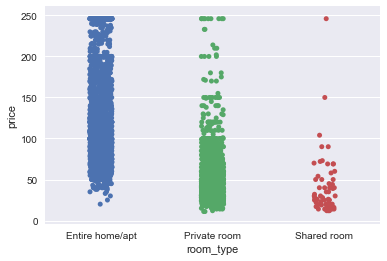

In [17]:
print('2. Categorical scatterplot')

sns.stripplot(y="price", x="room_type", data=df, jitter=True);

3. Violinplot


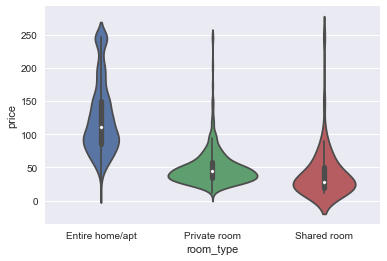

In [18]:
print('3. Violinplot')
sns.violinplot(y="price", x="room_type", data=df);

4. Bar Plot


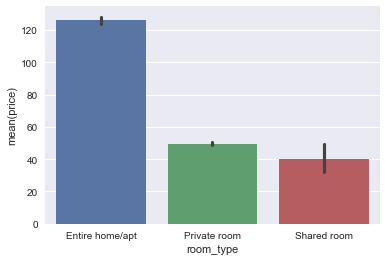

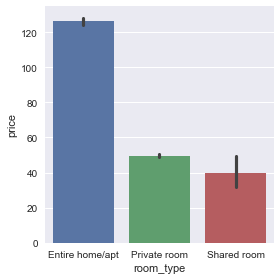

In [19]:
print('4. Bar Plot')
sns.barplot(x="room_type", y='price', data=df);
## why is mean used?

sns.factorplot(x="room_type", y='price', kind="bar", data=df);

4. Countplot


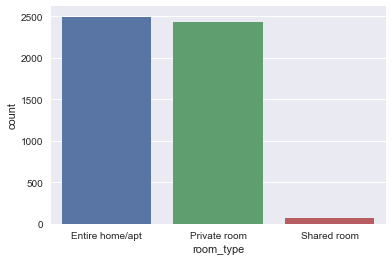

In [20]:
print('4. Countplot')
sns.countplot(x='room_type', data=df);

5. Pointplot


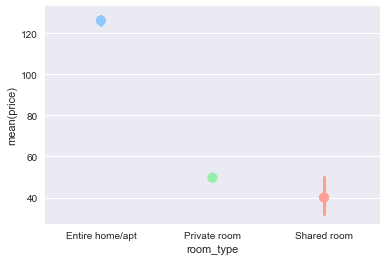

In [ ]:
print("5. Pointplot")
sns.pointplot(x='room_type', y='price', col ='room_type', data=df, palette="pastel");

#why is pointplot so 'pointed'?

In [ ]:
print("6. Swarmplot")
sns.swarmplot(x="room_type", y="price", data=df);

6. Swarmplot
